In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
Consumer_Key = "T5t3hgjjzRhPZNWceBIT1pZ6t"
Consumer_Secret_Key = "6mFaxpMxlPfctWScmWcvp37ikalQw1pqCCm90MHNteomHiVPEW"
Access_Token = "1458094172934754316-5C0hqnrCfgvrh0YQ4QQ9sYQLSSJ4HB"
Access_Token_Secret = "ajSCcCrzpUlzCw0Ttiwp2UOrwc3F4ltFIHfXqEMvKuHer"

In [3]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)

In [4]:
posts = api.user_timeline(screen_name = "LazadaSG", count = 199, tweet_mode = "extended")

print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
  print(str(1)+')'+ tweet.full_text+ '\n')
  i=i+1

Show the 5 recent tweets:

1)@wii__mii Can you please coordinate this matter to us via PM/DM for further assistance.

Thank you for your patience and understanding.

1)@wii__mii Hello wii__mii!

Thank you for reaching out to Lazada Singapore.

We sincerely apologize for the experience.

Kindly send us a PM/DM for further assistance.

Thank you.

1)@ParhamMansor We are sorry for the troubles this has caused you.

Can you please send us a PM/DM to check this at our end?

1)@ParhamMansor Hello Parham!

Thank you for reaching out to Lazada Singapore.

We apologize for the experience.

Kindly send us a PM/DM for further assistance.

Thank you.

1)Shop Lazada’s Grand Year-End Sale with Big Lazada Bonus happening on 12 Dec!

Start collecting Lazada Bonus from 1 – 12 Dec and enjoy $6 off Every $60.

Add to cart https://t.co/Ms1Q6Ixe8q

#Lazada #LazadaSG #Lazada1212 #LazadaGrandYearEndSale https://t.co/JkaXdZDrz9



In [5]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df.head()

,Tweets
0,@wii__mii Can you please coordinate this matte...
1,@wii__mii Hello wii__mii!\n\nThank you for rea...
2,@ParhamMansor We are sorry for the troubles th...
3,@ParhamMansor Hello Parham!\n\nThank you for r...
4,Shop Lazada’s Grand Year-End Sale with Big Laz...


In [6]:
def cleanTxt(text):
  text = re.sub('@[A-Za-z0-9]+', '', text)
  text = re.sub('#', '', text)
  text = re.sub('RT[\s]+', '', text)
  text = re.sub('https?:\/\/\s+', '', text)
  return text
df['Tweets'] = df['Tweets'].apply(cleanTxt)

df

,Tweets
0,__mii Can you please coordinate this matter to...
1,__mii Hello wii__mii!\n\nThank you for reachin...
2,We are sorry for the troubles this has caused...
3,Hello Parham!\n\nThank you for reaching out t...
4,Shop Lazada’s Grand Year-End Sale with Big Laz...
...,...
194,"As mentioned, as much as we wanted to assist ..."
195,For further information and clarifications re...
196,"Our apologies, as much as we wanted to assist..."
197,Thank you for verification.\n\nFor further in...


In [7]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,subjectivity,Polarity
0,__mii Can you please coordinate this matter to...,0.500000,0.000000
1,__mii Hello wii__mii!\n\nThank you for reachin...,0.633333,0.366667
2,We are sorry for the troubles this has caused...,1.000000,-0.500000
3,Hello Parham!\n\nThank you for reaching out t...,0.700000,0.300000
4,Shop Lazada’s Grand Year-End Sale with Big Laz...,0.533333,0.300000
...,...,...,...
194,"As mentioned, as much as we wanted to assist ...",0.304464,-0.124107
195,For further information and clarifications re...,0.500000,0.166667
196,"Our apologies, as much as we wanted to assist...",0.304464,-0.124107
197,Thank you for verification.\n\nFor further in...,0.500000,0.166667


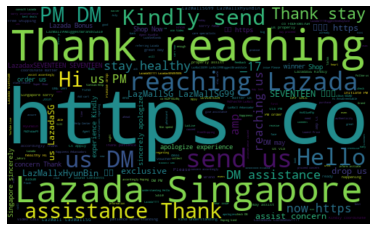

In [8]:
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state=10, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [9]:
#create a function to compute negative (-1) neutral (0) and positive (+1) analysis

def getAnalysis(score):
  if score < 0:
    return 'negative'
  elif score == 0:
    return 'neutral'
  else:
    return 'positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,subjectivity,Polarity,Analysis
0,__mii Can you please coordinate this matter to...,0.500000,0.000000,neutral
1,__mii Hello wii__mii!\n\nThank you for reachin...,0.633333,0.366667,positive
2,We are sorry for the troubles this has caused...,1.000000,-0.500000,negative
3,Hello Parham!\n\nThank you for reaching out t...,0.700000,0.300000,positive
4,Shop Lazada’s Grand Year-End Sale with Big Laz...,0.533333,0.300000,positive
...,...,...,...,...
194,"As mentioned, as much as we wanted to assist ...",0.304464,-0.124107,negative
195,For further information and clarifications re...,0.500000,0.166667,positive
196,"Our apologies, as much as we wanted to assist...",0.304464,-0.124107,negative
197,Thank you for verification.\n\nFor further in...,0.500000,0.166667,positive


In [10]:
print('Negative tweets:\n')

j=1
sortedDF = df.sort_values(by=['Polarity'], ascending=False)
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'negative'):
    print(str(j) + ') ' +sortedDF['Tweets'][i])
    print()
    j=j+1

Negative tweets:

1)  We are sorry for the troubles this has caused you.

Can you please send us a PM/DM to check this at our end?

2)  Hello Sanjeevdudhaiya! Thank you for reaching out to Lazada Singapore! We are very sorry to hear about that issue you are encountering. Please do drop us a DM in order for us to properly assist you with your concern. Thank you!

3)  Hello nainasbatra! Thank you for reaching out to Lazada Singapore! We are very sorry to hear about that. Please do drop us a PM in order for us to properly assist you with your concern. Thank you!

4)  Hello ADWTHW! Thank you for reaching out to Lazada Singapore! We are very sorry to hear about this issue. Please do drop us a PM in order for us properly assist you with your concern. Thank you!

5)  Hello taeftie! Thank you for reaching out to Lazada Singapore! We are sorry to hear about your unpleasant experience in our platform. Please do drop us a PM in order for us to properly assist you with your concern. Thank you!

6)

In [11]:
print('Positive tweets:\n')

j=1
sortedDF = df.sort_values(by=['Polarity'], ascending=False)
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'positive'):
    print(str(j) + ') ' +sortedDF['Tweets'][i])
    print()
    j=j+1

Positive tweets:

1) __mii Hello wii__mii!

Thank you for reaching out to Lazada Singapore.

We sincerely apologize for the experience.

Kindly send us a PM/DM for further assistance.

Thank you.

2)  Hello Parham!

Thank you for reaching out to Lazada Singapore.

We apologize for the experience.

Kindly send us a PM/DM for further assistance.

Thank you.

3) Shop Lazada’s Grand Year-End Sale with Big Lazada Bonus happening on 12 Dec!

Start collecting Lazada Bonus from 1 – 12 Dec and enjoy $6 off Every $60.

Add to cart https://t.co/Ms1Q6Ixe8q

Lazada LazadaSG Lazada1212 LazadaGrandYearEndSale https://t.co/JkaXdZDrz9

4) EVERGLOW officially invites you to join their Lazada Exclusive video call event 🌟 Winners will also receive a special polaroid signed by one of the members!

Shop ‘Return of the Girl’ on Lazada by 1 Dec 18:00 (KST): https://t.co/f3gQ8gb38d

EVERGLOW 에버글로우 KPOP LAZADASG https://t.co/ic2v9dAI5d

5) THE GIRLS ARE BACK! Get EVERGLOW’s latest album ‘Return of the Girl’ on 

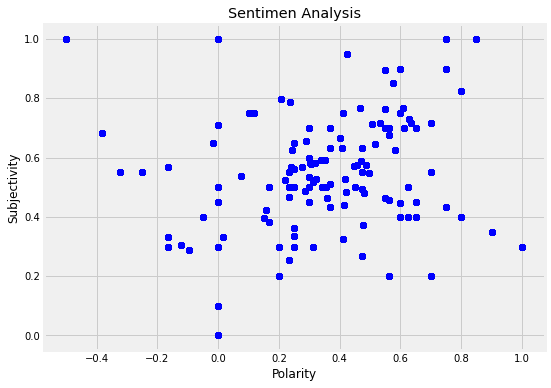

In [12]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'], df['subjectivity'], color='b')

plt.title('Sentimen Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()
  

In [13]:
potweets = df[df.Analysis == 'positive']
potweets = potweets['Tweets']

round ( (potweets.shape[0] / df.shape[0]) *100, 1)

81.4

In [14]:
netweets = df[df.Analysis == 'negative']
netweets = netweets['Tweets']

round ( (netweets.shape[0] / df.shape[0]) *100, 1)

8.0

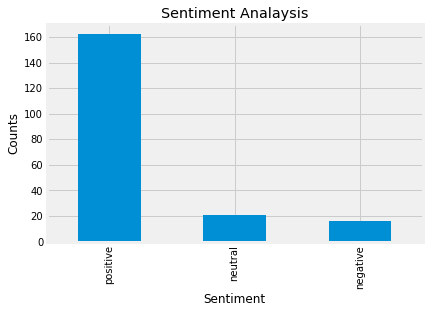

In [15]:
df['Analysis'].value_counts()

plt.title('Sentiment Analaysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()